<a href="https://colab.research.google.com/github/Rafacubas10/Tarea-final-/blob/main/Tarea_Final_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import optimizer

Ejercicio 1 Función a)

In [81]:
#ponemos híper parámetros para la red 
learning_rate = 0.01
epochs = 25
batch_size = 10

In [82]:
#convertimos los datos en arreglos y definimos el entrenamiento 
x_train = np.linspace(-1, 1, 1100)
y_train= 3 * np.sin(np.pi * x_train)

In [83]:
#ya se define la red con el modelo, las capas y sus respectivas neuronas 
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(25, activation='relu'),
    layers.Dense(1)
])
#Definimos la funcion de perdida
model.compile(loss='mse', optimizer= SGD(learning_rate=learning_rate))


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

model.summary()

#Entrenamos el modelo 
x_test = np.linspace(-1, 1, 10)
y_test = 3 * np.sin(np.pi * x_test)
loss_3 = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/1000
110/110 [==============================] - 0s 1ms/step - loss: 1.9375
Epoch 2/1000
110/110 [==============================] - 0s 1ms/step - loss: 1.0808
Epoch 3/1000
110/110 [==============================] - 0s 989us/step - loss: 1.0074
Epoch 4/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.9399
Epoch 5/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.8522
Epoch 6/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.7680
Epoch 7/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.6697
Epoch 8/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.5589
Epoch 9/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.4465
Epoch 10/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.3401
Epoch 11/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.2444
Epoch 12/1000
110/110 [==============================] - 0s 1ms/step - loss: 0.1723

1/1 [==============================] - 0s 42ms/step


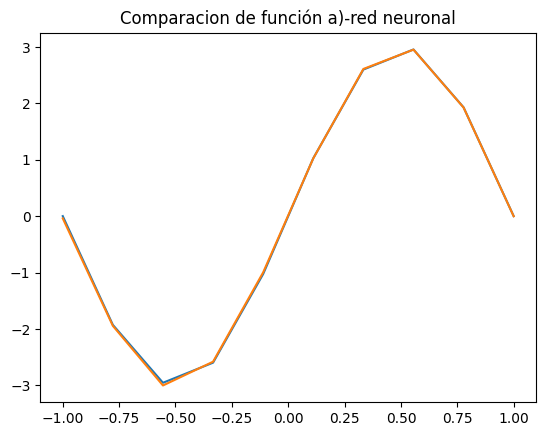

In [84]:
#Evaluamos para comparar y ver gráficamente si la red neuronal funciona
plt.plot(x_test, y_test, label='Función original')
plt.plot(x_test, model.predict(x_test), label='Red neuronal')
plt.title('Comparacion de función a)-red neuronal')
plt.show()

Ejercicio 1 Función b)

In [85]:

#definimos híper parámetros para la red neuronal
learning_rate1 = 0.01
epochs1 = 500
batch_size1 = 64

In [86]:
#convertimos en un arreglo los datos y definimos el entrenamiento
x_train1 = np.linspace(-1, 1, 1100)
y_train1 = 1 + 2 * x_train1 + 4 * x_train1**3

In [87]:
#difinimos el modelo para red neuronal agregando las capas y sus respectivas neuronas
model1 = keras.Sequential([
    layers.Dense(65, activation='relu', input_shape=(1,)),
    layers.Dense(65, activation='relu'),
    layers.Dense(1)
])

#definimos la función de perdida 
model1.compile(loss='mse', optimizer='adam')
history1 = model1.fit(x_train1, y_train1,
                    batch_size=64,
                    epochs=500,
                    verbose=1)

#entrenamos el modelo 
x_test1 = np.linspace(-1, 1, 10)
y_test1 = 1 + 2 * x_test1 + 4 * x_test1**3
loss1 = model1.evaluate(x_test1, y_test1, verbose=1)


Epoch 1/500
18/18 [==============================] - 0s 1ms/step - loss: 7.0009
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 5.5536
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 3.8790
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 2.0444
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 0.9458
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7096
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6337
Epoch 8/500
18/18 [==============================] - 0s 1ms/step - loss: 0.5701
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5145
Epoch 10/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4591
Epoch 11/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4010
Epoch 12/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 13/500
18/18 [=================

1/1 [==============================] - 0s 43ms/step


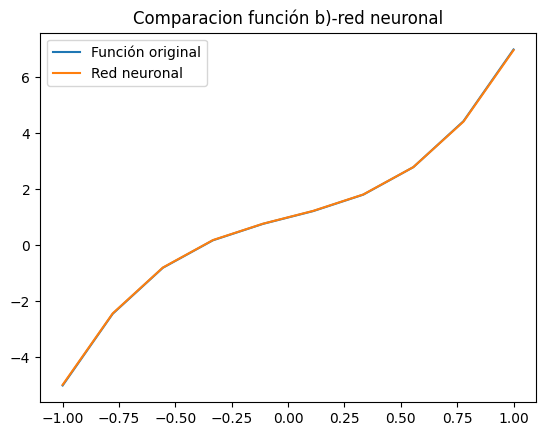

In [88]:
#Evaluamos para comparar y ver gráficamente si la red neuronal funciona
plt.plot(x_test1, y_test1, label='Función original')
plt.plot(x_test1, model1.predict(x_test1), label='Red neuronal')
plt.legend()
plt.title('Comparacion función b)-red neuronal')
plt.show()

Ejercicio 2
Plantas 

In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
#conectamos el colab con drive, para extraer las imágenes y el csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ejercicio 2 Tarjetas


In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [108]:
#extraemos el csv
datos = pd.read_csv('creditcard.csv')

In [109]:
#Normalizamos los datos para poder utilizarlos más facil
scaler2 = StandardScaler()
datos['normalizedAmount'] = scaler2.fit_transform(datos['Amount'].values.reshape(-1, 1))
datos = datos.drop(['Time', 'Amount'], axis=1)

In [110]:
#modificamos los datos para definir x y y 
X = datos.drop('Class', axis=1).values
y = datos['Class'].values

In [111]:
#difinimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [112]:
#definimos el modelo para la red neuronal 
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10))
model.add(Dense(1))

In [113]:

#definimos la función de perdida
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [114]:
#se entrena el modelo 
model=model.fit(X_train, y_train, epochs=30)

Epoch 1/30
7121/7121 [==============================] - 11s 1ms/step - loss: 0.0159 - accuracy: 0.9941
Epoch 2/30
7121/7121 [==============================] - 11s 1ms/step - loss: 0.0012 - accuracy: 0.9989
Epoch 3/30
7121/7121 [==============================] - 10s 1ms/step - loss: 8.6657e-04 - accuracy: 0.9990
Epoch 4/30
7121/7121 [==============================] - 10s 1ms/step - loss: 7.9828e-04 - accuracy: 0.9991
Epoch 5/30
7121/7121 [==============================] - 10s 1ms/step - loss: 7.9247e-04 - accuracy: 0.9991
Epoch 6/30
7121/7121 [==============================] - 10s 1ms/step - loss: 7.5719e-04 - accuracy: 0.9991
Epoch 7/30
7121/7121 [==============================] - 11s 2ms/step - loss: 7.3214e-04 - accuracy: 0.9992
Epoch 8/30
7121/7121 [==============================] - 10s 1ms/step - loss: 7.1606e-04 - accuracy: 0.9992
Epoch 9/30
7121/7121 [==============================] - 10s 1ms/step - loss: 7.0913e-04 - accuracy: 0.9992
Epoch 10/30
7121/7121 [======================

In [ ]:
print("Accuracy:", accuracy)